In [24]:
import numpy as np
import pandas as pd
%matplotlib inline 
# for getting the file path
import os

# for data visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns


# # for data analysis
# import pandas_profiling as profile
# import dabl

In [2]:
data = pd.read_csv(r'C:\Users\yecha\Documents\数据科学导论\online_shoppers_intention.csv')


# 预处理


In [3]:
# checking the shape of the data

data.shape

data.head()
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:

missing_percentage = data.isnull().sum()/data.shape[0]
print(missing_percentage)
data.info()


Administrative             0.001135
Administrative_Duration    0.001135
Informational              0.001135
Informational_Duration     0.001135
ProductRelated             0.001135
ProductRelated_Duration    0.001135
BounceRates                0.001135
ExitRates                  0.001135
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informa

In [5]:
# data.profile_report()

检查发现大部分的缺失数据为大规模缺失，并且缺失数据只有14行，因此采用删除

In [6]:
data[data.isnull().values==True]
data[data.isnull().T.any()].shape

(14, 18)

In [7]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

In [8]:
#后面做了类似操作
# data['Month'].astype("category")
# data['VisitorType'].astype('category')

# 描述性分析

Text(0, 0.5, 'count')

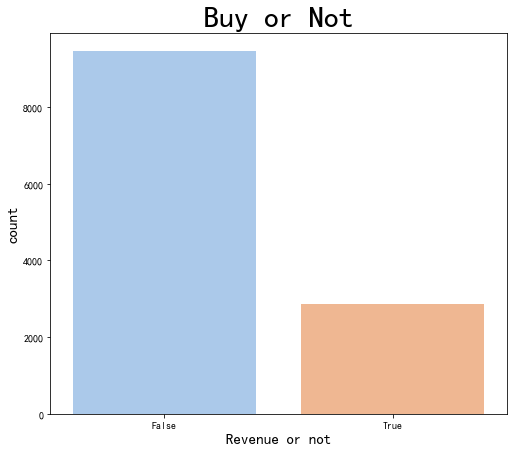

In [268]:
# ## 描述性分析

# In[ ]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(data['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

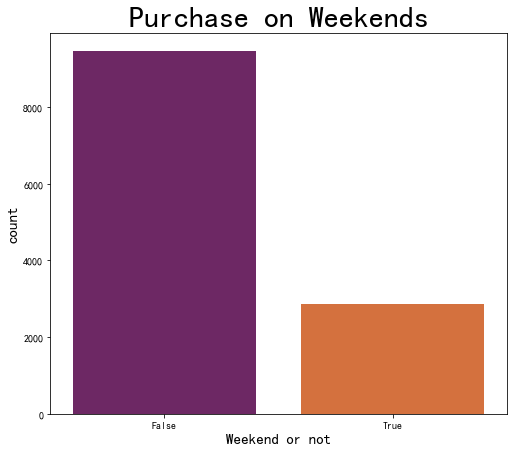

In [269]:
# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

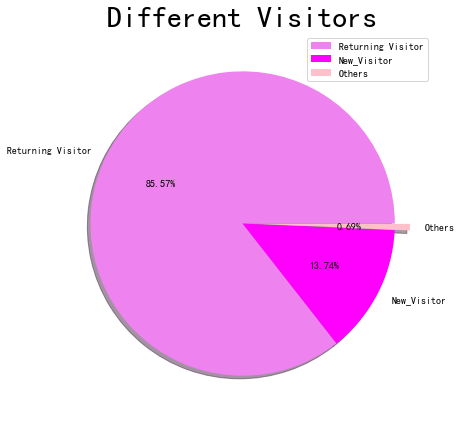

In [270]:
data['VisitorType'].value_counts()
# plotting a pie chart for browsers
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

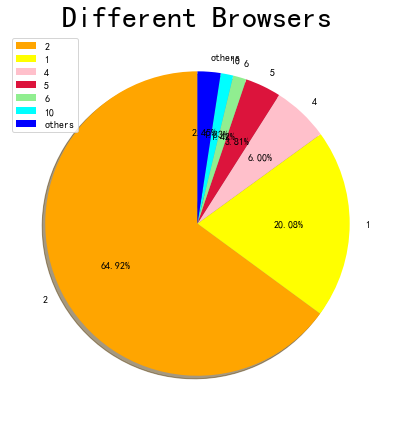

In [271]:
# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

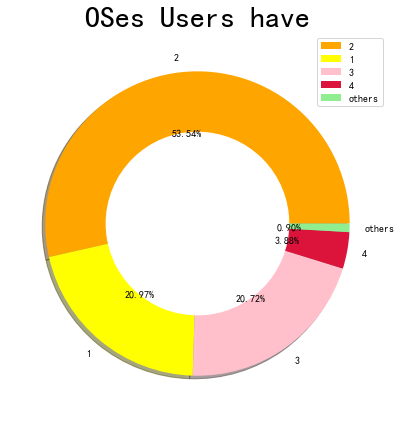

In [272]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

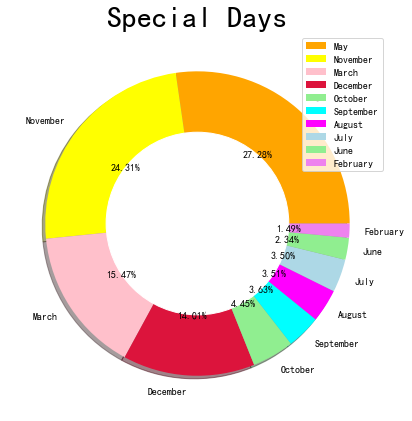

In [273]:
# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

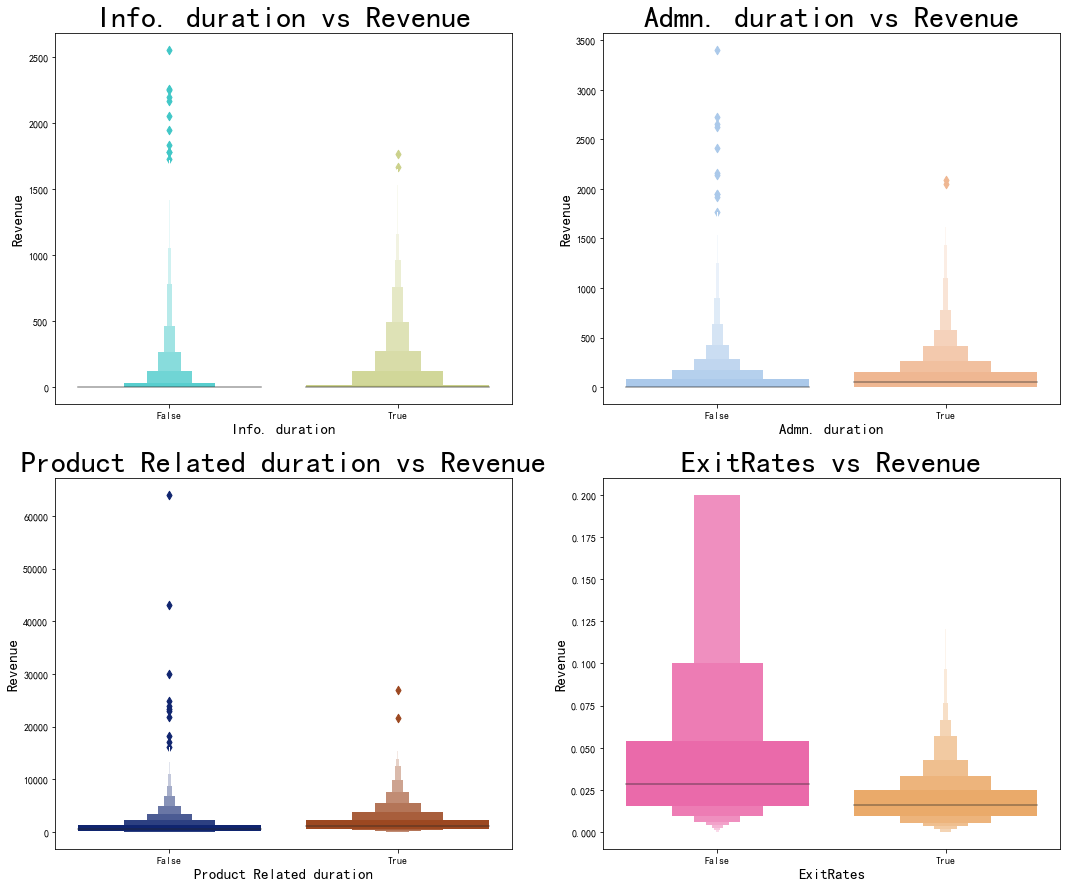

In [274]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(data['Revenue'], data['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(data['Revenue'], data['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(data['Revenue'], data['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(data['Revenue'], data['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()

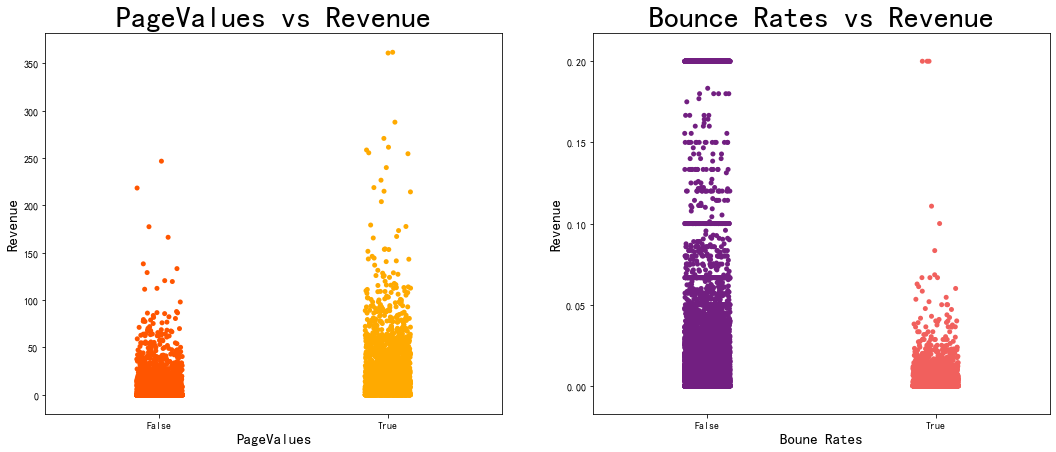

In [275]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(data['Revenue'], data['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

**这个图应该不要**

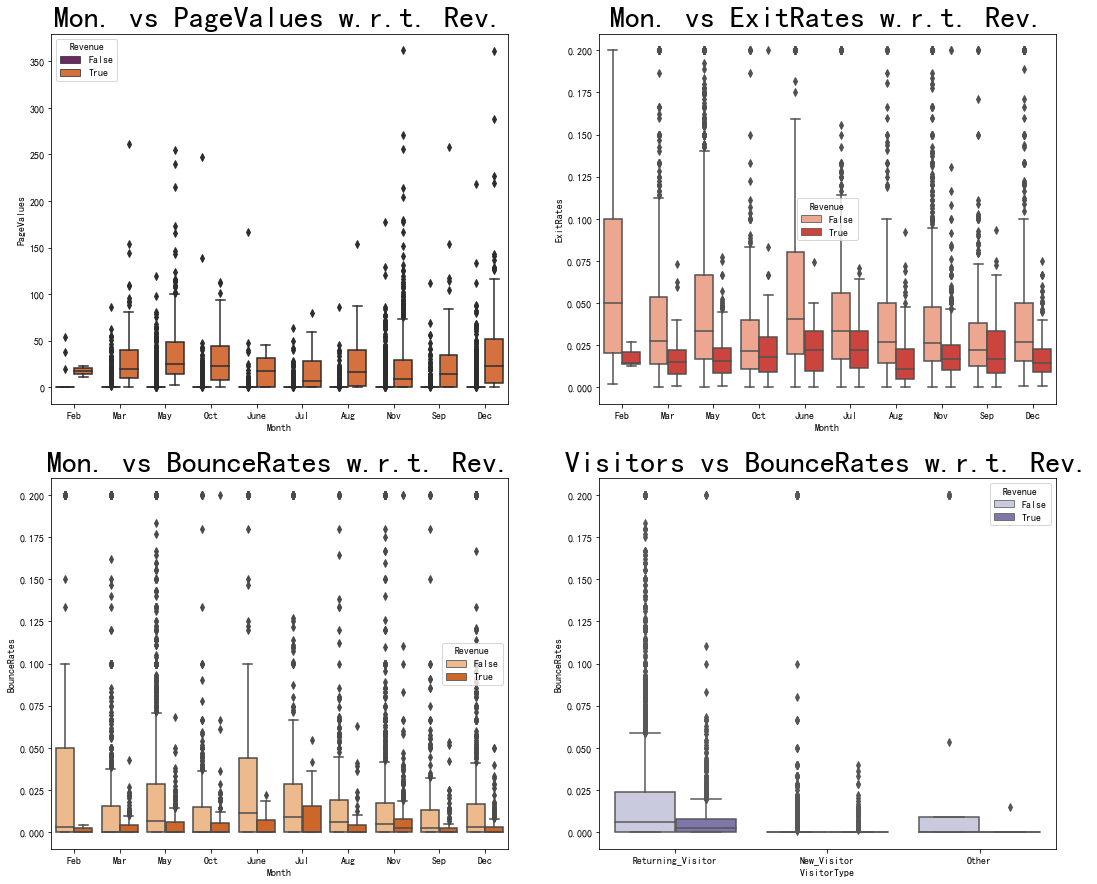

In [276]:
# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 30)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 30)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

## 分割数据集

In [9]:
#这个函数可以生成所有虚拟变量。把所有的文本列、分类变量都扩增为多个0-1变量
data1 = pd.get_dummies(data)
#Revenue是个布尔属性没有变化
data1.columns 
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12316 non-null  float64
 1   Administrative_Duration        12316 non-null  float64
 2   Informational                  12316 non-null  float64
 3   Informational_Duration         12316 non-null  float64
 4   ProductRelated                 12316 non-null  float64
 5   ProductRelated_Duration        12316 non-null  float64
 6   BounceRates                    12316 non-null  float64
 7   ExitRates                      12316 non-null  float64
 8   PageValues                     12316 non-null  float64
 9   SpecialDay                     12316 non-null  float64
 10  OperatingSystems               12316 non-null  int64  
 11  Browser                        12316 non-null  int64  
 12  Region                         12316 non-null 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# le.fit()可以对标签的序列匹配index，用le.classes_显示有哪些标签类别 用le.transform(字符标签序列)返回的是对应的index
# le.inverse_transform([0, 0, 1, 2])类似这样可以把index再转变为字符标签序列
# 这里我们用了sklearn的LabelEncoder对文本分类转换为离散的数值分类值。
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    10408
1     1908
Name: Revenue, dtype: int64

In [32]:
# splitting the data
x = data1
x[:]=preprocessing.scale(x)


# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1) #除了表示y的一列

y = data['Revenue']





from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

# getting dependent and independent variables

# x_train[:]=preprocessing.scale(x_train)

# x_test[:]=preprocessing.scale(x_test)


# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)


Shape of x_train : (9852, 28)
Shape of y_train : (9852,)
Shape of x_test : (2464, 28)
Shape of y_test : (2464,)


## 设定模型评估函数 ##
**传入一个模型,用上面的x_train, x_test, y_train, y_test进行评估**

In [59]:
def evalmodel(mod):
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    # evaluating the model
    print("Training Accuracy :", mod.score(x_train, y_train))
    print("Testing Accuracy :", mod.score(x_test, y_test))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams['figure.figsize'] = (6, 6)
    sns.heatmap(cm ,cmap="YlGnBu_r",annot_kws={'size':20,'weight':'bold'},annot = True) #行为真实，列为预测
    plt.show()
    # classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    
    #尝试引入ROC曲线和AUC值
    y_score=mod.predict_proba(x_test)[:,1] 
    print('y_score的值',y_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    #找出最优阈值
    thre=tpr-fpr
    index=thre.argmax()
    index2=abs(thresholds-0.5).argmin()
    
#     index2=np.argwhere(thresholds==0.5)
    print("index2为",index2)
    plt.figure(figsize=(8,7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC= %0.6f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')\
    
    plt.scatter(fpr[index],tpr[index],color='red',s=40,label='最优阈值=%.2f'%(thresholds[index]))
    
    plt.scatter(fpr[index2],tpr[index2],color='blue',s=40,label='阈值=%.2f'%(thresholds[index2]))
    
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right", shadow=True, fancybox =True,fontsize='large')
    plt.show()
    print('AUC值为%.06f' % roc_auc)
    
#显示最优阈值的得分
    y_pred=y_score>thresholds[index]
    cr = classification_report(y_test, y_pred)
    print('阈值为 %.2f时的精确率召回率'%(thresholds[index]),'\n',cr)
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams['figure.figsize'] = (6, 6)
    sns.heatmap(cm ,cmap="YlGnBu_r",annot_kws={'size':20,'weight':'bold'},annot = True)#行为真实，列为预测

In [58]:
abs(y-0.5).argmax()

0

In [39]:
# 随机森林分类

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier() # n_estimators：森林中树的数量


 **模型评估——样本外预测**
 
 cr = classification_report(y_test, y_pred)输出的是各个分类变量的查准率和查全率(或者说精确率与召回率)  
 在本课题中，我们认为网站需要找出尽可能多的有付费倾向的用户，进行推送广告优惠或者进行推荐。  
因此更重视分类1的查全率即TP/TP+FN 其中TP+FN表示所有氪金玩家，我们希望尽可能把他们划分为价值用户。

Training Accuracy : 1.0
Testing Accuracy : 0.90625


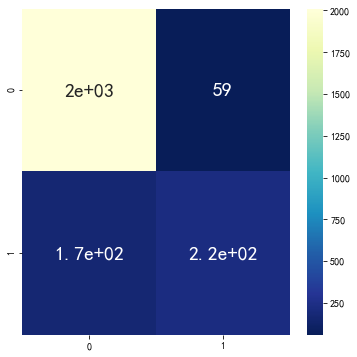

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2070
           1       0.79      0.56      0.66       394

    accuracy                           0.91      2464
   macro avg       0.86      0.77      0.80      2464
weighted avg       0.90      0.91      0.90      2464

y_score的值 [0.07 0.01 0.   ... 0.17 0.21 0.03]
index2为 46


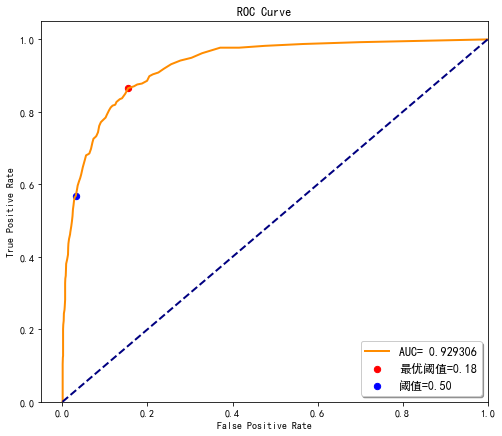

AUC值为0.929306
阈值为 0.18时的精确率召回率 
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      2070
           1       0.52      0.85      0.65       394

    accuracy                           0.85      2464
   macro avg       0.75      0.85      0.78      2464
weighted avg       0.90      0.85      0.86      2464



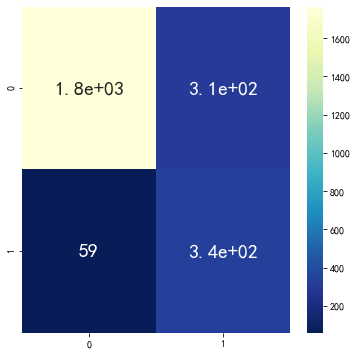

In [62]:

evalmodel(model)

In [26]:
importances = model.feature_importances_
print("重要性：",importances)
x.columns[np.argsort(importances)] 

重要性： [0.04300755 0.05816955 0.01818401 0.0272327  0.07264103 0.08952463
 0.05574399 0.08456074 0.35736384 0.00404628 0.01893617 0.02015436
 0.0318639  0.03124804 0.0112315  0.00325711 0.00633818 0.00036063
 0.00410645 0.00194916 0.00484048 0.00630739 0.02321125 0.00419201
 0.00456307 0.00788996 0.00037243 0.00870358]


Index(['Month_Feb', 'VisitorType_Other', 'Month_June', 'Month_Aug',
       'SpecialDay', 'Month_Jul', 'Month_Oct', 'Month_Sep', 'Month_Mar',
       'Month_May', 'Month_Dec', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor', 'Weekend', 'Informational',
       'OperatingSystems', 'Browser', 'Month_Nov', 'Informational_Duration',
       'TrafficType', 'Region', 'Administrative', 'BounceRates',
       'Administrative_Duration', 'ProductRelated', 'ExitRates',
       'ProductRelated_Duration', 'PageValues'],
      dtype='object')

下面这一段代码可以处理有string的分类变量
``` python
df2 = df.select_dtypes('object').copy() #快捷显示所有种类为object需要处理的
df2.head()
df2.dropna(inplace=True)

```
最简单的方式就是, 查找列中所有的字符串, 然后给不同的字符串一个编号, 然后用编号替换字符串:
使用vlaue_counts获取所有的字符串:
``` python
col = '目标列名'
strs = df2[col].value_counts()
strs
```
将所有字符串映射为数字:
``` python
value_map = dict((v, i) for i,v in enumerate(strs.index))
value_map

df2.replace({col:value_map})[col].head()
```
*方法二：适用于已经设置为category的字符分类变量*
``` python
bs = df2['body_style'].astype('category')
bs.head() #这里操作都做过了，但是要获得数值编号，需要用codes
bs.cat.codes.head()
```

*方法三：转变为哑变量/虚拟变量*
``` python
pd.get_dummies(df[['drive_wheels', 'body_style']]).head()
```

Scikit-Learn
``` python
from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(df2["body_style"])
pd.DataFrame(lb_results, columns=lb_style.classes_).head()
```


**如下代码可以进行处理通过对字符分类变量转换为编号的变量可以进行处理**  
但是没法表示1...12直接是分类，所以要进行随机森林还是必须要通过哑变量生成dummy
``` python
data = pd.read_csv(r'C:\Users\yecha\Documents\数据科学导论\online_shoppers_intention.csv')
data=data.dropna()

data['Month']=data['Month'].astype('category')
col='Month'
strs=data[col].value_counts()
value_map = dict((v, i) for i,v in enumerate(strs.index))
data['Month']=data['Month'].map(value_map)
data['Month'].head()
data['VisitorType']=data['VisitorType'].astype('category')
col='VisitorType'
strs=data[col].value_counts()
value_map = dict((v, i) for i,v in enumerate(strs.index))
data['VisitorType']=data['VisitorType'].map(value_map) #这里利用词典进行map把字符串换成了数值，但实际上模型预测的时候还是会认为是数值变量而不是数值分类变量
x=data
x=x.drop(['Revenue'], axis = 1) #一开始忘记drop完赋值了
y=data['Revenue']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 123)
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
```

### 交叉验证  
结果和手动划分结果一致。

In [22]:
model2=RandomForestClassifier()
# model2.fit(x,y) 交叉验证会进行多个模型的拟合求平均

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2,x,y,cv=10,scoring='accuracy')


print(scores)
print(scores.mean())

KeyboardInterrupt: 

``` python
print("特征重要性："+str(model2.feature_importances_))
importances = model.feature_importances_
print(np.argsort(-importances))#获取从小到大排序后的重要性程度的index索引
importances[np.argsort(importances)] #获取索引对应的数值
````

In [28]:
print(x.columns[np.argsort(importances)]) #可以看到最没用的和最重要的变量排行

x_columns = x.columns[1:]
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    # 对于最后需要逆序排序，我认为是做了类似决策树回溯的取值，从叶子收敛
    # 到根，根部重要程度高于叶子。
    print("%2d) %-*s %f" % (f + 1, 30, x.columns[indices[f]], importances[indices[f]]))
 

Index(['Month_Feb', 'VisitorType_Other', 'Month_June', 'Month_Aug',
       'SpecialDay', 'Month_Jul', 'Month_Oct', 'Month_Sep', 'Month_Mar',
       'Month_May', 'Month_Dec', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor', 'Weekend', 'Informational',
       'OperatingSystems', 'Browser', 'Month_Nov', 'Informational_Duration',
       'TrafficType', 'Region', 'Administrative', 'BounceRates',
       'Administrative_Duration', 'ProductRelated', 'ExitRates',
       'ProductRelated_Duration', 'PageValues'],
      dtype='object')
 1) PageValues                     0.357364
 2) ProductRelated_Duration        0.089525
 3) ExitRates                      0.084561
 4) ProductRelated                 0.072641
 5) Administrative_Duration        0.058170
 6) BounceRates                    0.055744
 7) Administrative                 0.043008
 8) Region                         0.031864
 9) TrafficType                    0.031248
10) Informational_Duration         0.027233
11) Month_Nov

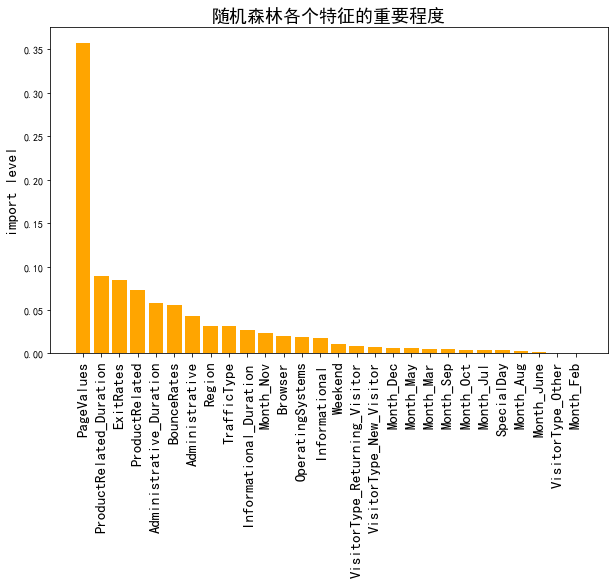

In [29]:

threshold = 0.08
x_selected = x_train.loc[:, importances > threshold]

# .iloc[:,0:3]
x_selected.loc[y_train==0].iloc[:,0]
x_selected.loc[y_train==0]


plt.figure(figsize=(10,6))
plt.title("随机森林各个特征的重要程度",fontsize = 18)
plt.ylabel("import level",fontsize = 15,rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"] #为了支持中文
plt.rcParams['axes.unicode_minus'] = False


for i in range(x.columns.shape[0]):
    plt.bar(i,importances[indices[i]],color='orange',align='center')
    plt.xticks(np.arange(x.columns.shape[0]),x.columns[np.argsort(importances)][::-1],rotation=90,fontsize=15)
plt.show()

### 选用这个3维图，转到一个合适的角度

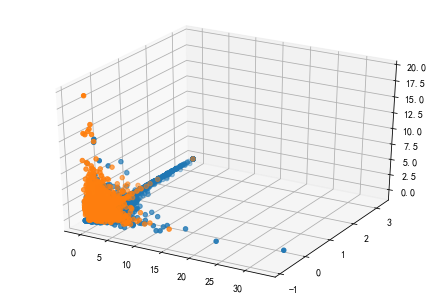

In [194]:


fig = plt.figure()
axes3d = Axes3D(fig)
x, y, z = x_selected.loc[y_train==0].iloc[:,0], x_selected.loc[y_train==0].iloc[:,1], x_selected.loc[y_train==0].iloc[:,2]
axes3d.scatter(x,y,z)
x, y, z = x_selected.loc[y_train==1].iloc[:,0], x_selected.loc[y_train==1].iloc[:,1], x_selected.loc[y_train==1].iloc[:,2]
axes3d.scatter(x,y,z)
ax.set_zlabel('PageValues')  # 坐标轴
ax.set_ylabel('ExitRates')
ax.set_xlabel('ProductRelated_Duration')
plt.show()



#### 逻辑回归比对

In [48]:
from sklearn import linear_model
model3=linear_model.LogisticRegression(solver='liblinear') 
# newton-cg, lbfgs和sag这三种优化算法时都需要损失函数的一阶或者二阶连续导数，因此不能用于没有连续导数的L1正则化，只能用于L2正则化。



Training Accuracy : 0.884185952090946
Testing Accuracy : 0.8831168831168831


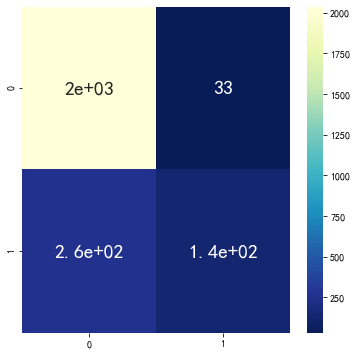

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2070
           1       0.81      0.35      0.49       394

    accuracy                           0.88      2464
   macro avg       0.85      0.67      0.71      2464
weighted avg       0.88      0.88      0.86      2464

y_score的值 [0.15294355 0.056972   0.00191338 ... 0.25001786 0.2565482  0.03546788]
index2为 57


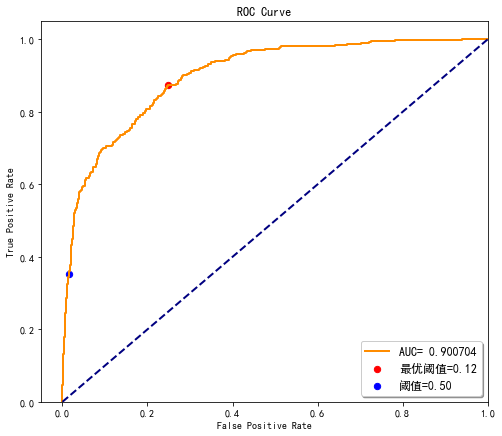

AUC值为0.900704
阈值为 0.12时的精确率召回率 
               precision    recall  f1-score   support

           0       0.97      0.75      0.85      2070
           1       0.40      0.87      0.55       394

    accuracy                           0.77      2464
   macro avg       0.68      0.81      0.70      2464
weighted avg       0.88      0.77      0.80      2464



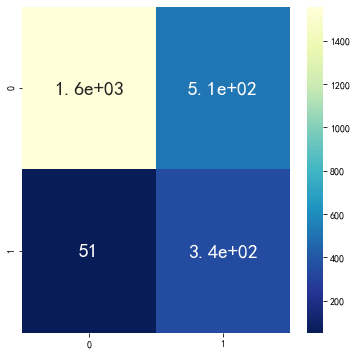

In [63]:
evalmodel(model3)

#### SVR支持向量进行回归

Training Accuracy : 0.903369874137231
Testing Accuracy : 0.8924512987012987


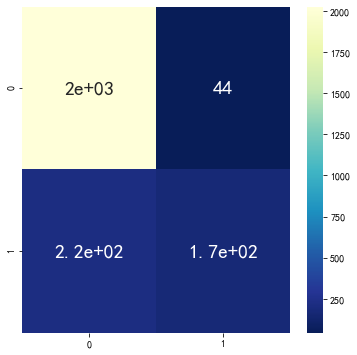

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2070
           1       0.80      0.44      0.57       394

    accuracy                           0.89      2464
   macro avg       0.85      0.71      0.75      2464
weighted avg       0.88      0.89      0.88      2464

y_score的值 [0.08620448 0.03308063 0.07290225 ... 0.08154899 0.14911611 0.060567  ]
index2为 66


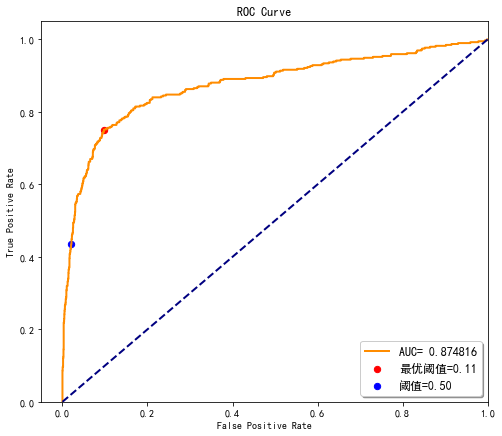

AUC值为0.874816
阈值为 0.11时的精确率召回率 
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      2070
           1       0.59      0.75      0.66       394

    accuracy                           0.88      2464
   macro avg       0.77      0.83      0.79      2464
weighted avg       0.89      0.88      0.88      2464



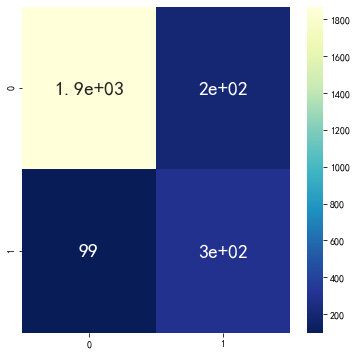

In [65]:
from sklearn.svm import SVC
model4=SVC(probability=True)
evalmodel(mod=model4) #屎一样的召回率

#### 支持向量机  
把数据变成-1-0之间的数据再看看相同操作是否有改进

这样子就可以保留列名
``` python
x = data1
x[:]=preprocessing.scale(x)
x = x.drop(['Revenue'], axis = 1) 
y = data['Revenue']
```


**SVR，支持向量回归**  
这里发现不可以，因为这类似与线性模型是对于一个连续变量进行预测的，不适用于分类变量。或者说输出的结果是0-1中的小数  
SVR预测器中的参数有  
kernal核函数一般常用的有’rbf’，’linear’，’poly’  
C:惩罚因子。C表征你有多么重视离群点，C越大越重视，越不想丢掉它们。C值大时对误差分类的惩罚增大，C值小时对误差分类的惩罚减小。当C越大，趋近无穷的时候，表示不允许分类误差的存在，margin越小，容易过拟合；当C趋于0时，表示我们不再关注分类是否正确，只要求margin越大，容易欠拟合  
gamma: 是’rbf’，’poly’和’sigmoid’的核系数且gamma的值必须大于0。随着gamma的增大，存在对于测试集分类效果差而对训练分类效果好的情况，并且容易泛化误差出现过拟合。
``` python
# model5 = SVR(kernel='rbf',C=50,max_iter=10000)
# 核函数一般常用的有’rbf’，’linear’，’poly’
model5 = SVR(C=50)
# evalmodel(model5)
model5.fit(x_train,y_train)

```

In [241]:
# model5=SVC(C=50)
# evalmodel(mod=model5)
# #增加C的值继续提升了召回率

**我们要关注的重点在于y的值为1的值，因此我们要计算的是预测1的准确率**


## 主成分分析

In [66]:
from sklearn.decomposition import PCA

In [67]:
#做了个三维图，x的值没了
#重新运行一遍
x = data1
x = x.drop(['Revenue'], axis = 1) #除了表示y的一列
y = data['Revenue']
x[:]=preprocessing.scale(x)

In [68]:



pca=PCA(n_components=3)
pca.fit(x)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)


[0.12449817 0.08500178 0.06475273]
[3.48623171 2.38024314 1.81322354]


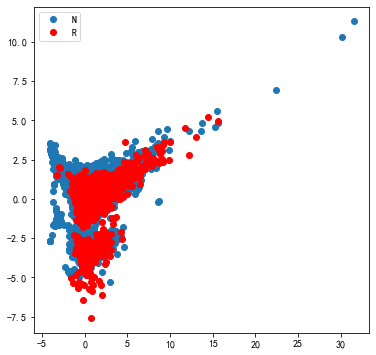

In [69]:
x_new = pca.transform(x)

plt.plot(x_new[y==0, 0], x_new[y==0, 1], 'o',label='N')
plt.plot(x_new[y==1, 0], x_new[y==1, 1], 'ro',label='R')
plt.legend(loc=0);

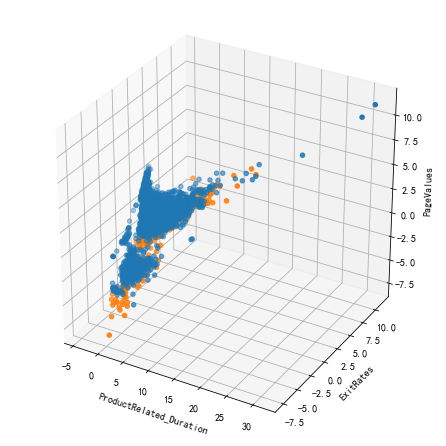

In [72]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_new[y==0, 0], x_new[y==0, 1],x_new[y==0, 1],cmap=plt.cm.nipy_spectral)

ax.scatter(x_new[y==1, 0], x_new[y==1, 1],x_new[y==1, 1],cmap=plt.cm.nipy_spectral)
ax.set_zlabel('PageValues')  # 坐标轴
ax.set_ylabel('ExitRates')
ax.set_xlabel('ProductRelated_Duration')
plt.show()


屎一样的TSNE，放弃聚类,建议别运行


In [83]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)

X_tsne = tsne.fit_transform(x)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title(' t-SNE projection');

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

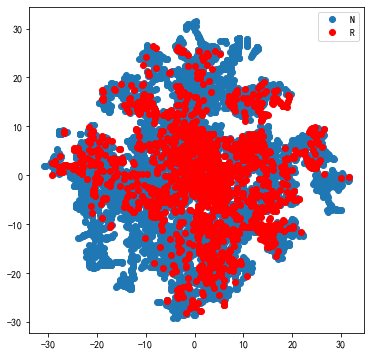

In [80]:

plt.plot(X_tsne[y==0, 0], X_tsne[y==0, 1], 'o',label='N')
plt.plot(X_tsne[y==1, 0], X_tsne[y==1, 1], 'ro',label='R')
plt.legend(loc=0);

### GBDT

Training Accuracy : 0.9185952090946001
Testing Accuracy : 0.9070616883116883


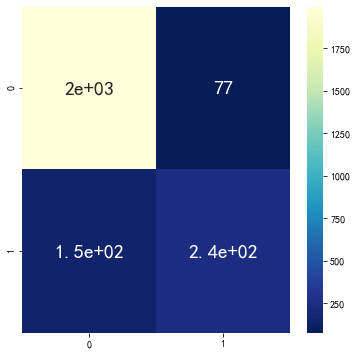

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2070
           1       0.76      0.61      0.68       394

    accuracy                           0.91      2464
   macro avg       0.84      0.79      0.81      2464
weighted avg       0.90      0.91      0.90      2464

y_score的值 [0.07121365 0.01081084 0.00584795 ... 0.10389926 0.27207902 0.02140387]
index2为 114


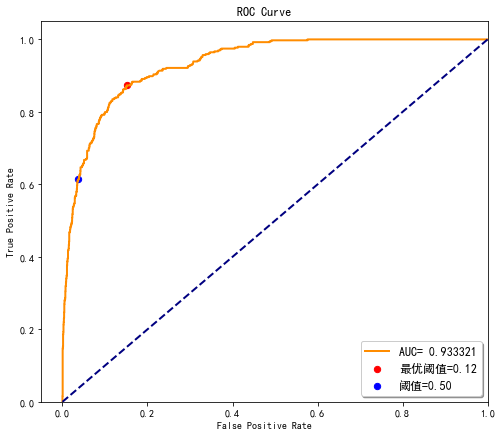

AUC值为0.933321
阈值为 0.12时的精确率召回率 
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      2070
           1       0.52      0.87      0.65       394

    accuracy                           0.85      2464
   macro avg       0.75      0.86      0.78      2464
weighted avg       0.90      0.85      0.87      2464



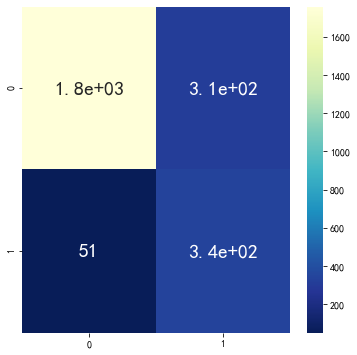

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# gbc = GradientBoostingClassifier(
#     # boosting参数
#     init=None,
#     n_estimators=100,
#     learning_rate=0.1, 
#     subsample=0.8,
#     loss='deviance',
#     # 分割参数
#     max_features='sqrt',
#     criterion='friedman_mse',
#     # 分割停止参数
#     min_samples_split =1200, 
#     min_impurity_split=None,
#     min_impurity_decrease=0.0,
#     max_depth=7,
#     max_leaf_nodes=None,
#     # 剪枝参数
#     min_samples_leaf =60, 
#     warm_start=False,
#     random_state=10
# )

gbc = GradientBoostingClassifier()

evalmodel(gbc)

Training Accuracy : 0.9853836784409257
Testing Accuracy : 0.8981331168831169


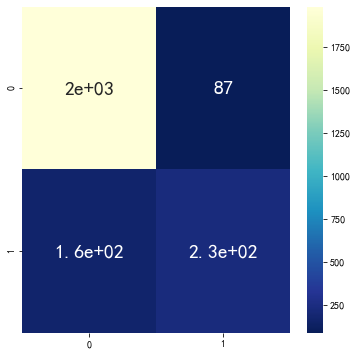

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2070
           1       0.73      0.58      0.65       394

    accuracy                           0.90      2464
   macro avg       0.82      0.77      0.79      2464
weighted avg       0.89      0.90      0.89      2464

y_score的值 [5.64034432e-02 1.42564881e-03 1.04466846e-04 ... 1.52043343e-01
 2.45340914e-01 5.10623120e-03]
index2为 106


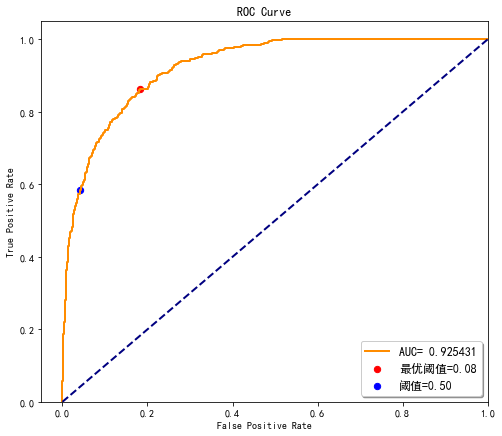

AUC值为0.925431
阈值为 0.08时的精确率召回率 
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      2070
           1       0.47      0.86      0.61       394

    accuracy                           0.82      2464
   macro avg       0.72      0.84      0.75      2464
weighted avg       0.89      0.82      0.84      2464



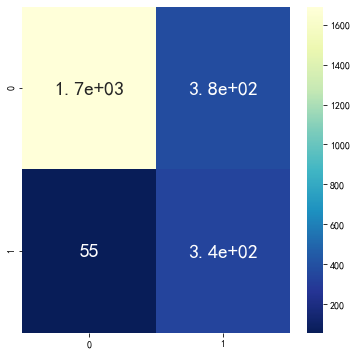

In [76]:
import xgboost as xgb
# modelxgb = xgb.XGBRegressor() #这个错误，无法生成混淆矩阵，因为这个结果是个回归值
#如果要用xgb做回归问题
modelxgb=xgb.XGBClassifier(min_child_weight = 0.5,objective='multi:softmax',num_class = 30)
evalmodel(modelxgb)

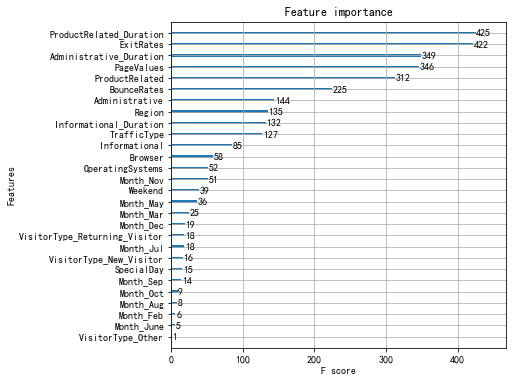

In [77]:
from xgboost import plot_importance
plot_importance(modelxgb)
plt.show()

Training Accuracy : 1.0
Testing Accuracy : 0.900974025974026


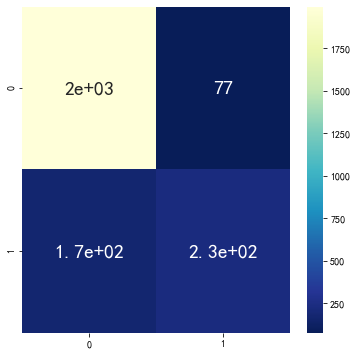

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2070
           1       0.75      0.58      0.65       394

    accuracy                           0.90      2464
   macro avg       0.83      0.77      0.80      2464
weighted avg       0.89      0.90      0.90      2464

y_score的值 [8.7367240e-03 2.4159543e-05 2.8302852e-06 ... 8.2924441e-02 5.5356827e-02
 6.7062431e-04]
index2为 99


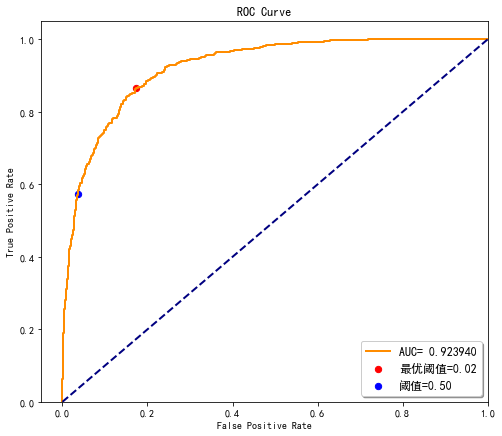

AUC值为0.923940
阈值为 0.02时的精确率召回率 
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      2070
           1       0.49      0.86      0.62       394

    accuracy                           0.83      2464
   macro avg       0.73      0.85      0.76      2464
weighted avg       0.89      0.83      0.85      2464



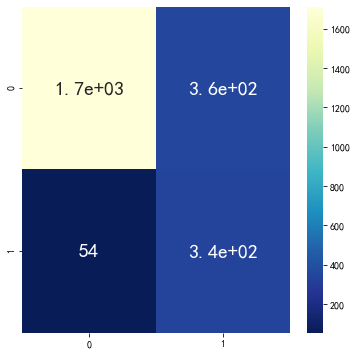

In [78]:
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=0.5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
evalmodel(xgb1)

### 最后运行

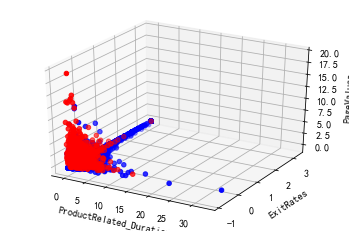

In [193]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline

x, y, z = x_selected.loc[y_train==0].iloc[:,0], x_selected.loc[y_train==0].iloc[:,1], x_selected.loc[y_train==0].iloc[:,2]
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x, y, z, c='b')  # 绘制数据点
x, y, z = x_selected.loc[y_train==1].iloc[:,0], x_selected.loc[y_train==1].iloc[:,1], x_selected.loc[y_train==1].iloc[:,2]
ax.scatter(x, y, z, c='r')
ax.set_zlabel('PageValues')  # 坐标轴
ax.set_ylabel('ExitRates')
ax.set_xlabel('ProductRelated_Duration')
plt.show()

